### 2장 사이킷런으로 머신러닝 이해하기
사이킷런은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리로 많은 데이터 분석가가 의존하는 대표적인 파이썬 ML라이브러리입니다.

#### 붓꽃 품종 예측하기
붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것입니다.

In [1]:
from sklearn.datasets import load_iris  # 사이킷런 패키지 내 존재하는 붗꽃 데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier # 머신러닝 알고리짐은 의사결정 트리 알고리즘
from sklearn.model_selection import train_test_split #  데이터 세트를 학습, 테스트 데이터를 분리하는 함수

In [2]:
 import pandas as pd

In [3]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

print("iris 타겟값 :",iris_label)
print("iris 타겟명 :",iris.target_names)

iris_df = pd.DataFrame(data= iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris 타겟값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris 타겟명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


피처에는 sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)가 있습니다.  
레이블( 결정값 )은 0, 1, 2으로 돼있으며 0 :Setosa 품종, 1 :versicolor 품종, 2: virginica 품종을 의미합니다.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2,random_state=11)

학습데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하며 사이킷런에서는 train_test_split( )를 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 분할할 수 있습니다.  
  
iris_data는 피처 데이터 세트이며, iris_label은 레이블 데이터 세트, test_size는 테스트 데이터 세트의 비율, random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생값입니다.

In [5]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

DecisionTreeClassifier객체의 fit( ) 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 학습을 수행하며, 이를 이용해 예측을 수행합니다.

In [6]:
pred = dt_clf.predict(X_test)

예측은 학습 데이터가 아닌 다른 데이터를 이용해야하며, 테스트 데이터 세트를 이용합니다.  
predit( ) 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환하게 됩니다.

In [7]:
from sklearn.metrics import accuracy_score
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


예측 결과를 기반으로 DecisionTreeClassifier의 예측 성능을 평가해보았으며, 머신러닝 모델의 성능 평가 방법은 여러가지가 존재합니다.  
정확도를 평가할 때는 accuracy_score( )의 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력합니다.

붓꽃 데이터 세트로 분류 예측 프로세스  
* 데이터 세트의 분리 -> 학습, 테스트 데이터로 데이터를 분리합니다.
* 모델 학습 -> 학습 데이터를 이용해 머신러닝 알고리즘을 적용해 모델을 학습 [ fit( ) ]
* 예측 수행 -> 학습된 머신러닝 모델을 이용해 테스트 데이터의 분류를 예측 [ predict( ) ]
* 평가 -> 실제 결괏값과 예측된 결과값을 비교해 머신러닝 모델 성능을 평가 

#### 사이킷런의 기반 프레임워크 익히기

#####  Estimator 이해 및 fit( ), predict( ) 메서드  

사이킷런은 머신러닝 모델 학습을 위해서 fit( )메서드를, 학습된 모델의 예측을 위해 predict( )메서드를 제공합니다.  
사이킷런 클래스는 fit( )과 predict( )만을 이용해 간단하게 학습과 예측 결과를 반환하는데 분류 알고리즘을 Classifier, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭합니다. 사이킷런은 많은 유형의 Classifier와 Regressor 클래스를 제공하며 이들을 합쳐 Estimator 클래스라고 부릅니다.

##### 사이킷런 주요 모듈
* 예제 데이터  
  sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
* 피처 처리  
  sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공( 인코딩, 정규화, 스케일링등),  
  sklearn.feature_selection : 알고리즘에 영향을 미치는 피처순으로 설렉션 작업 수행하는 기능제공,  
  sklearn.feature_extraction : 텍스트,이미지 데이터의 벡터화된 피처를 추출하는데 사용  
      ( sklearn.feature_extraction.text, sklearn.feature_extraction.image )  
* 피처 처리 & 차원 축소  
  sklearn.decomposition : PCA, NMF등을 통해 차원 축소 기능을 수행할 수 있도록 하는 모듈  
* 데이터 분리, 검증 & 파라미터 튜닝  
  sklearn.model_selection : 학습용/테스트용 분리, grid search로 최적 파라미터 추출등의 API 제공  
* 평가  
  sklearn.metrics : 분류, 회귀, 클러스터링에 대한 성능 측정 방법 제공( Accuarcy, precision, Recall등 )  
* 머신러닝 알고리즘  
  sklearn.ensemble : 앙상블 알고리즘, 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅등을 제공  
  sklearn.linear_model : 선형 회귀, 릿지, 라쏘 및 로지스틱 회귀등 회귀 관련 알고리즘 지원  
  sklearn.naive_bayes : 나이브 베이즈 알고리즘, 가우시안 NB, 다항 분포 NB 제공  
  sklearn.neighbors : 최근접 이웃 알고리즘 제공, K-NN등  
  sklearn.svm : 서포트 벡터 머신 알고리즘 제공  
  sklearn.tree : 의사 결정 알고리즘 제공  
  sklearn.cluster : 비지도 클러스터링 알고리즘 제공( k-평균, 계층형,DBSCAN 등 )  
* 유틸리티  
  sklearn.pipeline : 피처 처리등의 변환, 머신러닝 알고리즘 학습, 예측등을 함께 실행가능한 유틸리티 제공  

##### 내장된 예제 데이터 세트
* datasets.load_boston()  
  미국 보스턴의 집 피처들과 가격에 대한 데이터 세트, 회귀 용도  
* datasets.load_breast_cancer()
  위스콘신 유방암 피처들과 악성/ 음성 레이블 데이터 세트, 분류 용도  
* datasets.load_diabetes()  
  당뇨 데이터 세트, 회귀 용도  
* datasets.load_iris()  
  붓꽃에 대한 피처를 가진 데이터 세트, 분류 용도

사이킷런에 내장된 데이터 세트는 딕셔너리 형태로 되어있으며,  
data, target, taret_name, feature_names, DESCR로 구성되어 있습니다.  
  
  * data : 피처의 데이터 세트  ( ndarray 타입 )
  * target : 분류시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트  ( ndarray 타입 )  
  * target_names : 개별 레이블의 이름  ( ndarray 타입 or list 타입 )
  * feature_names : 피처의 이름  ( ndarray 타입 or list 타입 )
  * DESCR : 데이터 세트에 대한 설명과 각 피처의 설명  ( ndarray 타입 or list 타입 )

In [8]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


sklearn.utils.Bunch는 파이썬 list형태와 유사합니다.

In [9]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

#### Model Selection 모듈 소개

##### 학습/테스트 데이터 세트 분리
train_test_split( )는 첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력받습니다. 그리고 다음 파라미터를 다음과 같이 입력받습니다.  
* test_size : 전체 데이터에서 테스트 데이터세트 크기를 얼마로 샘플링할 것인가를 결정, default는 25%.
* train_size : 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정, 하지만 잘 사용되지 않습니다.
* random_state : 호출시 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값입니다. 수행하지 않고 train_test_split를 수행 시 수행할 때마다 다른 학습/테스트용 데이터를 생성합니다.  
* shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정합니다. default는 True입니다.    

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test,y_train, y_test= train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [11]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


##### 교차  검증
고정된 학습 데이터와 테스트 데이터로 평가를 하다보면 결국 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 되므로, 결국은 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우 성능이 저하됩니다. 이러한 문제점을 개선하기 위해 교차 검증을 이용해 다양한 학습과 평가를 수행합니다.  
교차 검증에는 K-Fold와 StratifiedKFold 클래스를 제공합니다.

###### K-Fold

K폴드 교차 검증은 가장 보편적으로 사용되는 교차 검증 기법으로 K개의 데이터 폴드 세트를 만들어 K번만큼  각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법입니다.

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성합니다.  
전체 데이터는 150개이므로 학습용 데이터 세트는 120개, 테스트용 데이터 세트는 30개로 분할됩니다

In [13]:
n_iter = 0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test,pred),3)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print("{0} 교차 검증 정확도 :{1}, 학습 데이터 크기:{2}, 테스트 데이터 크기:{3}".format(n_iter, accuracy, train_size, test_size))
    print("{0} 검증 세트 인덱스 :{1}".format(n_iter, test_index))
    print("{0} 학습 세트 인덱스 :{1}".format(n_iter, train_index),"\n")
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

1 교차 검증 정확도 :1.0, 학습 데이터 크기:120, 테스트 데이터 크기:30
1 검증 세트 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
1 학습 세트 인덱스 :[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 

2 교차 검증 정확도 :0.967, 학습 데이터 크기:120, 테스트 데이터 크기:30
2 검증 세트 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
2 학습 세트 인덱스 :[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  

5번 교차 검증 결과 평균 검증 정확도는 0.9입니다. 그리고 교차 검증 시마다 split( ) 함수가 어떻게 인덱스를 할당하는지 확인할 수 있습니다.

###### Stratified K폴드

Stratified K폴드는 불균형한 분포도를 가진 레이블( 결정 클래스) 데이터 집합을 위한 K-폴드 방식으로 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말합니다.

In [14]:
import pandas as pd

In [15]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df["label"] = iris.target
iris_df["label"].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [16]:
kfold = KFold(n_splits=3)
n_iter=0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]
    print("교차검증:{0}".format(n_iter))
    print("학습 레이블 데이터 분포 :\n",label_train.value_counts())
    print("검증 레이블 데이터 분포 :\n",label_test.value_counts())
    print("-------------------------")

교차검증:1
학습 레이블 데이터 분포 :
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64
-------------------------
교차검증:2
학습 레이블 데이터 분포 :
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64
-------------------------
교차검증:3
학습 레이블 데이터 분포 :
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64
-------------------------


교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습, 검증 레이블이 다른 값으로 추출되었습니다.  
이런 경우 첫 번째 교차 검증에서는 학습 레이블의 1,2 값이 각각 50개, 검증 레이블 0값이 50개 추출되었는데, 학습 레이블은 1,2 밖에 없으므로 0의 경우는 전혀 학습하지 못하며, 검증 레이블은 0밖에 없으므로 학습모델은 0을 예측하지 못하는 문제점이 발생하며 이런 경우 검증 예측 정확도는 0이 될 수밖에 없습니다.

In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0
for train_index, test_index in skf.split(iris_df, iris_df["label"]):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("교차검증:{0}".format(n_iter))
    print("학습 레이블 데이터 분포 :\n",label_train.value_counts())
    print("검증 레이블 데이터 분포 :\n",label_test.value_counts())
    print("-------------------------")

교차검증:1
학습 레이블 데이터 분포 :
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    17
1    17
0    17
Name: label, dtype: int64
-------------------------
교차검증:2
학습 레이블 데이터 분포 :
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    17
1    17
0    17
Name: label, dtype: int64
-------------------------
교차검증:3
학습 레이블 데이터 분포 :
 2    34
1    34
0    34
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    16
1    16
0    16
Name: label, dtype: int64
-------------------------


StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split( )메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요합니다.

출력 결과를 보면 학습, 검증 레이블 데이터 값의 분포도가 동일하게 할당되었습니다.

In [18]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index  in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 3)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 99, 검증 데이터 크기: 51
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]

#2 교차 검증 정확도 :0.922, 학습 데이터 크기: 99, 검증 데이터 크기: 51
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133]

#3 교차 검증 정확도 :0.979, 학습 데이터 크기: 102, 검증 데이터 크기: 48
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98  0.922 0.979]
## 평균 검증 정확도: 0.9603333333333334


StratifiedKFold를 이용해 데이터를 분리하고, 피처 데이터와 레이블 데이터는 KFold 예제에서 추출한 데이터를 그대로 이용한 결과 교차 검증한 결과 평균 검증 정확도는 약 96.04%로 측정됐습니다.

###### cross_val_score( )
KFold로 데이터를 학습하고 예측하는 코드는 다음과 같은 과정을 거칩니다.  
1. 폴드 세트를 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출  
3. 반복적으로 학습, 예측 수행하고 성능 반환  
  
이러한 과정을 한번에 수행해주는 API로 Cross_val_score( )가 있습니다.


cross_val_score 주요 파라미터  
* cross_val_score(estimator, X, y=None, scoring=None, cv )
1. estimator : 사이킷런으 분류 알고리즘 클래스인 Classifier, 회귀 알고리즘 클래스인 Regressor를 의미  
2. X, y : 피처 데이터 세트, 레이블 데이터 세트  
3. scoring : 예측 성능 평가 지표  
4. cv : 교차 검증 폴드 수  


In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.9804 0.9216 0.9792]
평균 검증 정확도: 0.9604


기본적으로 cross_val_score()는 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주며, 이전 StratifiedKFold와 정확도가 동일하게 출력되는데, 이유는 cross_val_score()는 내부적으로 StratifiedKFold를 이용하기 때문입니다.

###### gridsearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에 시행

사이킷런은 GridSearchCV API를 이용해 Classifier, Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줍니다. 사용자가 튜닝하고자 하는 여러 종류의하이퍼 파라미터를 다양하게 테스트하여 최적의 파라미터를 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 점은 단점입니다.

GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터  
* estimator : classifier, regressor, pipeline이 사용될 수 있습니다.
* param_grid : key + 리스트 값을 가지는 딕셔너리가 주어지며, estimator의 튜닝을 위해 파라미터명과 사용될 파라미터 값을 지정합니다.  
* scoring : 예측 성능을 측정할 평가 방법을 지정합니다.
* cv : 교차 검증을 위해 분할되는 학습/테스트 개수를 지정합니다.
* refit : default가 True이며, True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다.

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=121)

dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

테스트할 하이퍼 파라미터 세트는 딕셔너리 형태로 하이퍼 파라미터의 명칭은 문자열 key값으로, 하이퍼 파라미터의 값은 리스트 형으로 설정하여 max_depth와 min_samples_split의 값을 변화시키면서 최적화를 진행하겠습니다.

In [33]:
import pandas as pd

In [37]:
grid_dtree = GridSearchCV(dtree,param_grid = parameters, cv = 3, refit = True)

grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


GridsearchCV 객체의 fit(학습 데이터 세트) 메서드를 수행하면 학습 데이터를 cv와 param_grid에서 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 결과를 cv_results_속성에 기록합니다.  
cv_results_는 딕셔너리 형태로 key값과 리스트 형태의 value값을 가지며 데이터프레임 형태로 바꿔주면 쉽게 볼 수 있습니다.

주요 칼럼별 의미
* params : 수행할 때마다 적용된 개별 하이퍼 파라미터값
* rank_test_score : 성능이 좋은 score 순위를 나타나며 1이 가장 뛰어난 순위입니다.
* mean_test_score : 개별 하이퍼 파라미터별로 cv의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값입니다.
* split_test_score : cv의 수에 따라 설정된 폴딩 세트에서 각각 테스트한 성능 수치입니다.

In [45]:
print(grid_dtree.best_params_)
print('{0:.3f}'.format(grid_dtree.best_score_))

{'max_depth': 3, 'min_samples_split': 2}
0.975


GridsearchCV 객체의 fit을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 평가 결과 값은 각각  
best_params_, best_score_에 저장됩니다.

In [50]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)

print('{0:.3f}'.format(accuracy_score(y_test,pred)))

0.967


refit = True이면 GridsearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator로 저장하며, 이미 학습된 best_estimator_를 이용해 train_test_split( )으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가할 수 있습니다.

#### 데이터 전처리

##### 데이터 인코딩

###### 레이블인코딩
카테고리 피처를 코드형 숫자 값으로 변환하는 것

In [54]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변화값 : ',labels)
print("인코딩 클래스 : ",encoder.classes_)

인코딩 변화값 :  [0 1 4 5 3 3 2 2]
인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행하고, encoder.classes_를 통해 어떤 문자열이 어떤 숫자 값으로 인코딩 됐는지 0번부터 순서대로 확인할 수 있습니다.

레이블 인코딩은 문자열 값을 숫자값으로 변환하는데, 머신러닝에서는 숫자 값의 크고 작음에 대한 가중치가 더 부여되는 문제가 발생해 예측 성능이 떨어지는 경우가 발생할 수 있습니다.

###### 원-핫 인코딩
새로운 피처를 추가해 고유 값에 해당하는 칼럼에는 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법입니다.
즉, 행 형태의 피처 고유값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시합니다.

In [62]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_label = oh_encoder.transform(labels)

print(oh_label.toarray())
print(oh_label.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환되어야 하며, 입력값으로 2차원 데이터가 필요합니다.

In [66]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
print(df)
pd.get_dummies(df)

   item
0    TV
1   냉장고
2  전자렌지
3   컴퓨터
4   선풍기
5   선풍기
6    믹서
7    믹서


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


원핫 인코딩을 더 쉽게 사용하기 위해서는 판다스에 get_dummies( )를 이용하면 됩니다. 숫자형 값으로 변환 없이도 바로 변환이 가능합니다.

##### 피처 스케일링과 정규화

###### StandardScaler
개별 피처를 평균이 0이고 분산이 1인 값으로 변환해주며, 가우시안 정규 분포를 가질 수 있도록 데이터를 변환합니다.

In [70]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data= iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


StandardScaler 객체를 생성한 후에 fit()과 transform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 변환되며, 스케일 변환된 데이터세트는 ndarray이므로 데이터프레임으로 변환해 확인하는 것이 좋습니다.

###### MinMaxScaler
데이터 값을 0과 1사이의 범위 값으로 변환합니다. 음수 값이 존재하면 -1에서 1값으로 변환합니다.

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

print('feature 들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

feature 들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### 예제

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [88]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**NULL 컬럼 처리**

In [98]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())
titanic_df["Cabin"] = titanic_df["Cabin"].fillna('N')
titanic_df["Embarked"] = titanic_df["Embarked"].fillna('N')

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [99]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
C106             1
A10              1
E46              1
B42              1
E77              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [102]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
titanic_df["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [105]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

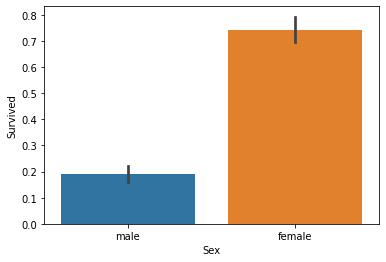

In [106]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

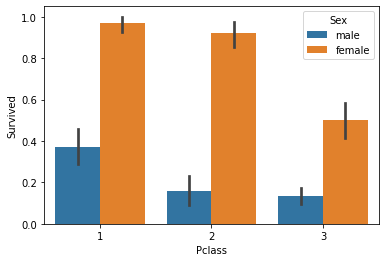

In [107]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

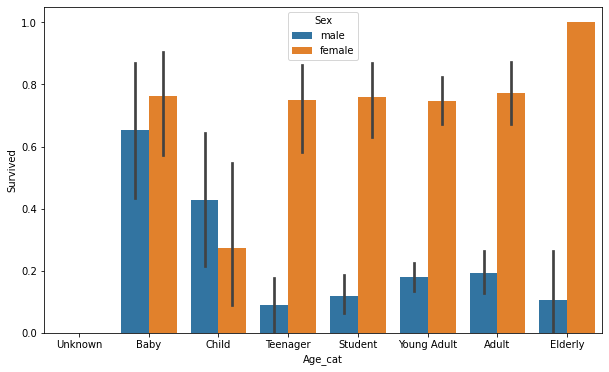

In [113]:
 def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x : get_category(x))
sns.barplot(data=titanic_df, x='Age_cat',y='Survived',hue='Sex', order=group_names)

In [115]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [116]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [122]:
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2, random_state=11)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [126]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [127]:
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7877


In [128]:
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8324


C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [129]:
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8659


C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [130]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train) 
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [131]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


In [132]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
